In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ScreenTime vs MentalWellness.csv")

In [3]:
df = df.drop("Unnamed: 15", axis=1)
df["exercise_hours"] = df["exercise_minutes_per_week"] / (60 * 7)
df = df.drop("exercise_minutes_per_week", axis=1)
df["social_hours"] = df["social_hours_per_week"] / 7
df = df.drop("social_hours_per_week", axis=1)
df = df.round(2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  mental_wellness_index_0_100  400 non-null    float64
 13  exercise_hours      

<Axes: >

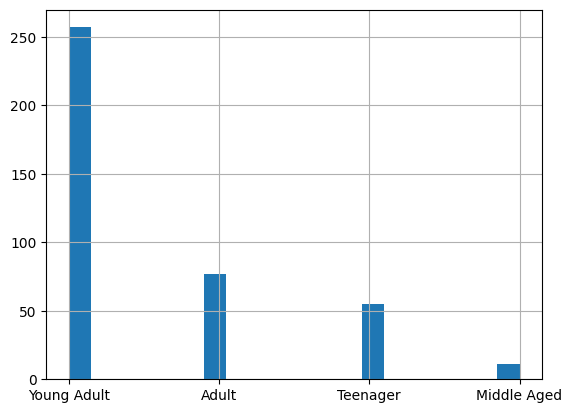

In [11]:
df["age_group"].hist(bins=20)

In [9]:
df["age_group"] = pd.cut(df["age"], bins=[0, 21, 35,45, 65, 100], labels=["Teenager", "Young Adult", "Adult", "Middle Aged", "Senior"])
df["sleep_hours_group"] = pd.cut(df["sleep_hours"], bins=[0, 6, 7, 9, 24], labels=["Severely Insufficient", "Insufficient", "Adequate", "Excessive"])

df["screen_time_group"] = pd.qcut(df["screen_time_hours"], 4, labels=["Low", "Moderate", "High", "Very High"])
df["work_time_group"] = pd.qcut(df["work_screen_hours"], 4, labels=["Low", "Moderate", "High", "Very High"])
df["leisure_time_group"] = pd.qcut(df["leisure_screen_hours"], 4, labels=["Low", "Moderate", "High", "Very High"])
df["productivity_group"] = pd.qcut(df["productivity_0_100"], 4, labels=["Low", "Moderate", "High", "Very High"])


In [12]:
median = df["mental_wellness_index_0_100"].median()

df["wellness_group"] = pd.cut(
    df["mental_wellness_index_0_100"],
    bins=[-float("inf"), median, float("inf")],
    labels=["Not Favorable", "Favorable"],
    include_lowest=True
)
# df["wellness_group"].value_counts()

In [13]:
cols_to_round = ["stress_level_0_10", "productivity_0_100"]
df[cols_to_round] = np.floor(df[cols_to_round]).astype(int)

In [14]:
df.head(10)

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,...,mental_wellness_index_0_100,exercise_hours,social_hours,age_group,sleep_hours_group,screen_time_group,work_time_group,leisure_time_group,productivity_group,wellness_group
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,...,9.3,0.30,0.10,Young Adult,Insufficient,Very High,Very High,Low,Moderate,Not Favorable
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,...,56.2,0.18,0.30,Young Adult,Adequate,Moderate,Low,High,Very High,Favorable
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,...,3.6,0.16,1.14,Young Adult,Insufficient,High,Moderate,Very High,High,Not Favorable
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,...,0.0,0.00,0.81,Adult,Insufficient,Very High,Low,Very High,Low,Not Favorable
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,...,0.0,0.34,1.44,Young Adult,Severely Insufficient,Very High,Very High,Very High,Low,Not Favorable
5,U0006,28,Non-binary/Other,Self-employed,Hybrid,9.83,0.53,9.30,7.19,1,...,5.0,0.17,1.47,Young Adult,Adequate,High,Low,Very High,Moderate,Not Favorable
6,U0007,42,Non-binary/Other,Retired,Remote,6.02,2.82,3.20,7.44,2,...,43.7,0.34,0.67,Adult,Adequate,Low,High,Low,Very High,Favorable
7,U0008,36,Male,Employed,In-person,6.21,0.75,5.46,6.78,2,...,54.3,0.12,2.67,Adult,Insufficient,Low,Moderate,Low,Very High,Favorable
8,U0009,26,Male,Student,In-person,6.28,0.67,5.61,8.48,4,...,86.8,0.35,1.44,Young Adult,Adequate,Low,Low,Moderate,Very High,Favorable
9,U0010,34,Male,Employed,Hybrid,9.37,0.84,8.53,7.78,2,...,10.7,0.12,1.81,Young Adult,Adequate,High,Moderate,Very High,Low,Not Favorable


In [15]:
df.to_csv("processed_screen_time_vs_mental_wellness.csv", index=False)